# Bank Churners Prediction (Modeling)

## 1. Importing libraries and dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
X_train = pd.read_csv('..\Dataset\X_train1.csv', index_col=0).reset_index(drop=True)
X_test = pd.read_csv('..\Dataset\X_test1.csv', index_col=0).reset_index(drop=True)
y_train = pd.read_csv('..\Dataset\y_train1.csv', index_col=0).reset_index(drop=True).values.ravel()
y_test = pd.read_csv('..\Dataset\y_test1.csv', index_col=0).reset_index(drop=True).values.ravel()

In [3]:
X_train.head()

,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.791543,1,0.498352,1,4,1,2,0.002708,-1.841984,0.745299,-0.415160,0.324106,0.617387,0.267968,1.339053,0.244997,-0.264551,0.056721,-0.480486
1,-0.037350,2,1.269124,4,1,1,2,0.002708,-0.550727,-1.400375,1.442415,0.274543,0.291116,0.247961,-0.444369,-0.043189,0.611758,0.276500,-0.545072
2,0.716844,2,-1.813965,1,2,1,1,0.002708,0.740530,-1.400375,-0.415160,-0.657427,-0.068149,-0.650666,0.711856,0.353397,0.934609,1.070698,0.549300
3,-1.420038,1,-0.272420,4,2,4,1,-0.753447,1.386159,0.745299,0.513627,1.462074,0.127369,1.449226,0.270090,-0.665639,0.473394,-1.072140,-0.792651
4,0.716844,2,0.498352,3,2,1,1,0.632838,-1.196355,0.745299,-0.415160,-0.778979,-0.446965,-0.737843,-0.777057,0.350375,1.165217,0.251525,0.961932


## 2. Customer attrition prediction using K Nearest Neighbors Classifier

Tuning hyperparameters for KNN classifier

In [4]:
# define models and parameters
param_grid = {'n_neighbors': list(range(1,11)), 'leaf_size': list(range(1,50)), 'p':[1,2]}
knn = KNeighborsClassifier()

# define randomized search cv and train the training dataset
knn_cv = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv=5, scoring='f1_weighted')
best_model = knn_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'p': 2, 'n_neighbors': 5, 'leaf_size': 10}
Best Score: 0.9018159951049485


Creating an optimum KNN Classifier by using best parameters from RandomizedSearchCV()

Model: KNeighborsClassifier(leaf_size=10)
Precision Score: 0.840
Recall Score: 0.597
Training Accuracy: 0.938
Test Accuracy: 0.914
F1 Score: 0.908


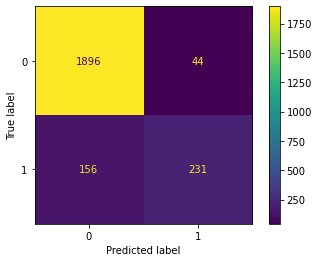

In [5]:
# Create the optimum KNN Classifier
optimum_knn = KNeighborsClassifier(p = best_params['p'], n_neighbors = best_params['n_neighbors'], leaf_size = best_params['leaf_size'])
# optimum_knn = KNeighborsClassifier(p = 2, n_neighbors = 5, leaf_size = 45)

#Train the model using the training sets
optimum_knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = optimum_knn.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_knn)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_knn.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_knn.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_knn, X_test, y_test, values_format = 'd' ))

## 3. Customer attrition prediction using Logistic Regression Classifier

Tuning hyperparameters for Logistic Regression classifier

In [6]:
# define models and parameters
c_space = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': c_space, 'penalty' : ['l2']}
logreg = LogisticRegression(solver='newton-cg', max_iter=100)

# define randomized search cv and train the training dataset
logreg_cv = GridSearchCV(logreg, param_grid = param_grid, cv = 5)
best_model = logreg_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.8984240687679084


Model: LogisticRegression(C=0.1)
Precision Score: 0.778
Recall Score: 0.589
Training Accuracy: 0.901
Test Accuracy: 0.904
F1 Score: 0.898


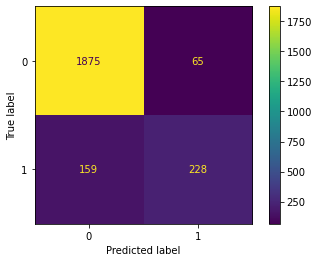

In [7]:
# Create the optimum Logistic Regression Classifier
optimum_logreg = LogisticRegression(C = best_params['C'], penalty = best_params['penalty'])
# optimum_logreg = LogisticRegression(C = 0.1, penalty = 'l2')

#Train the model using the training sets
optimum_logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_logreg.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_logreg)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_logreg.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_logreg.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_logreg, X_test, y_test, values_format = 'd' ))

## 4. Customer attrition prediction using Decision Tree Classifier

Tuning hyperparameters for Decision Tree classifier

In [8]:
# define models and parameters
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth' : list(range(1,10))}
clf = DecisionTreeClassifier()

# define randomized search cv and train the training dataset
clf_cv = RandomizedSearchCV(clf, param_distributions = param_grid, cv = 5)
best_model = clf_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'max_depth': 7, 'criterion': 'entropy'}
Best Score: 0.9409742120343839


Model: DecisionTreeClassifier(criterion='entropy', max_depth=7)
Precision Score: 0.880
Recall Score: 0.755
Training Accuracy: 0.959
Test Accuracy: 0.942
F1 Score: 0.940


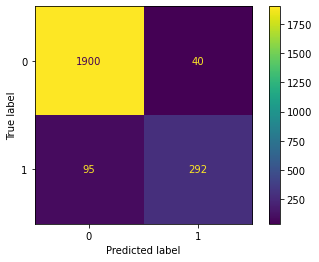

In [9]:
#Create the optimum Decision Tree Classifier
optimum_clf = DecisionTreeClassifier(criterion = best_params['criterion'], max_depth = best_params['max_depth'])

#Train the model using the training sets
optimum_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_clf)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_clf.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_clf.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_clf, X_test, y_test, values_format = 'd' ))

## 5. Customer attrition prediction using Support Vector Machines (SVM) Classifier

In [10]:
# define models and parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid, refit=True, verbose=2)

best_model = svc_cv.fit(X_train, y_train)

print(best_model.best_params_)

best_params = best_model.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.5s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.0min finished


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Model: SVC(C=10, gamma=0.1)
Precision Score: 0.839
Recall Score: 0.770
Training Accuracy: 0.999
Test Accuracy: 0.937
F1 Score: 0.936


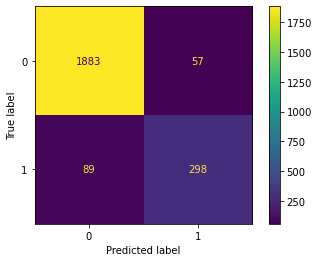

In [11]:
# Create a svm Classifier
clf = SVC(C = best_params['C'], gamma = best_params['gamma'], kernel = best_params['kernel']) 
# clf = SVC(C = 10, gamma = 0.1, kernel = 'rbf')

#Train the model using the training sets
optimum_clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_clf)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_clf.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_clf.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_clf, X_test, y_test, values_format = 'd' ))

## 6. Customer attrition prediction using Random Forest Classifier

In [12]:
# define models and parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomForestClassifier()

# define randomized search cv and train the training dataset
clf_cv = RandomizedSearchCV(clf, param_distributions = param_grid, cv = 5, n_jobs = -1)
best_model = clf_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
Best Score: 0.9548710601719197


Model: RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_split=5, n_estimators=1400, random_state=42)
Precision Score: 0.934
Recall Score: 0.840
Training Accuracy: 1.000
Test Accuracy: 0.963
F1 Score: 0.963


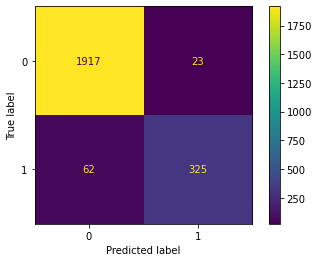

In [13]:
#Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators = best_params['n_estimators'], min_samples_split = best_params['min_samples_split']\
                             , min_samples_leaf = best_params['min_samples_leaf'], max_features = best_params['max_features']\
                             , max_depth = best_params['max_depth'], bootstrap = best_params['bootstrap'], random_state=42)

#Train the model using the training sets
optimum_clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_clf)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_clf.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_clf.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_clf, X_test, y_test, values_format = 'd' ))

## 7. Customer attrition prediction using Gradient Boosting Classifier

In [9]:
# Define models and parameters
param_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gbc = GradientBoostingClassifier()

# define randomized search cv and train the training dataset
gbc_cv = RandomizedSearchCV(gbc, param_distributions = param_grid, cv = 5, n_jobs=-1)
best_model = gbc_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.9702005730659025


In [10]:
# Create the optimum Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], learning_rate = best_params['learning_rate']
                                 , max_depth = best_params['max_depth'], n_jobs=-1) 

#Train the model using the training sets
optimum_gbc = gbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_gbc.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_gbc)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_gbc.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_gbc.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_gbc, X_test, y_test, values_format = 'd' ))

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

## 8. Customer attrition prediction using XGB Classifier

In [ ]:
# DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Define models and parameters

param_grid = {'max_depth':range(3,10,1), 'min_child_weight':range(1,6,2), 
              'gamma':[i/10.0 for i in range(0,5)], 'n_estimators' : list(range(100,2000,100)), 
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric="logloss")

# define randomized search cv and train the training dataset
xgb_cv = RandomizedSearchCV(xgb_clf, param_distributions = param_grid, cv = 5, verbose=1, n_jobs=-1)
best_model = xgb_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

In [ ]:
# Instantiate the optimum XGBClassifier: xgb_cl
xgb_cl = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, n_jobs=1,
                          reg_alpha = best_params['reg_alpha'], n_estimators = best_params['n_estimators'],
                          min_child_weight = best_params['min_child_weight'], max_depth = best_params['max_depth'],
                          gamma = best_params['gamma'], eval_metric='logloss')

# Fit the classifier to the training set
optimum_xgb = xgb_cl.fit(X_train, y_train)


# Predict the labels of the test set: preds
y_pred = optimum_xgb.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_xgb)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_xgb.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_xgb.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_xgb, X_test, y_test, values_format = 'd' ))

## Final Outcomes

I have used different classifier algorithms to accurately detect customer churn. We know, hyperparameters are essential for finding the best results from a model. For that reason, I have used hyperparameter tuning for each algorithms to find the best hyperparameters. Among all of those algorithms the ensemble methods worked well and have showed significantly high scoring values for precision, recall, and f1 score. I have used three differend kind of ensemble methods including Random Forest Classifier, Gradient Boosting Classifier, and XGBoost Classifier for training and testing. Among those three ensemble methods XGBoost showed significantly high Precision, Recall, F1 Score, Training Accuracy, and Test Accuracy values. The resultant summary of XGBoost are: Precision Score: 0.937, Recall Score: 0.889, Training Accuracy: 1.000, Test Accuracy: 0.972, F1 Score: 0.971